**Testing the effect of score on NFL interception rates**

Hypothesis: Quarterbacks throw a higher rate of interceptions when their teams are trailing than winning.

Methods: Assess NFL play-by-pay data and measure how interception rates change when the scoring margin changes.

In [0]:
import pandas as pd
import numpy as np
import os

from sqlalchemy import create_engine
from scipy import stats

import seaborn as sns 

In [0]:
#Import data for the last 5 seasons from nflscrapR 

#Accompanying code to clean each year's data was provided by nflscrapR. Everything else is my own.

YEAR = 2019

data = pd.read_csv('https://raw.githubusercontent.com/' + \
                       'ryurko/nflscrapR-data/master/' + \
                       'play_by_play_data/regular_season/reg_pbp_' + str(YEAR) + '.csv',
                       low_memory=False)

data = data.loc[
    (data['epa'].notnull()) &
    ((data['play_type'] == 'no_play') |
    (data['play_type'] == 'pass') |
    (data['play_type'] == 'run'))
]




data.drop(data[(data['replay_or_challenge'] == 0) & (data['desc'].str.contains('Timeout'))].index, inplace=True)

data = data.loc[data.desc.str.contains('kneels|spiked') == False]

data['desc'].loc[data['play_type'] == 'no_play']

data.loc[data.desc.str.contains('left end|left tackle|left guard|up the middle|right guard|right tackle|right end|rushes'),
'play_type'] = 'run'

data.loc[data.desc.str.contains('scrambles|sacked|pass'), 'play_type'] = 'pass'

data.reset_index(drop=True, inplace=True)

#Create a smaller dataframe with plays where passer_player_name is null
passer_nan = data.loc[(data['play_type'] == 'pass') &
         (data['passer_player_name'].isnull())]
#Create a list of the indexes/indices for the plays where passer_player_name is null
passer_nan_indices = list(passer_nan.index)

data.incomplete_pass.loc[data.interception==1] = 1


for i in passer_nan_indices:
    #Split the description on the blank spaces, isolating each word
    desc = data['desc'].iloc[i].split()
    #For each word in the play description
    for j in range(0,len(desc)):
        #If a word is pass
        if desc[j] == 'pass':
            data['passer_player_name'].iloc[i] = desc[j-1]            
        else:
            pass
#Change any backwards passes that incorrectly labeled passer_player_name as Backward
data.loc[data['passer_player_name'] == 'Backward', 'passer_player_name'] == float('NaN')

data.insert(69, 'success', 0)

data.loc[data['epa'] > 0, 'success'] = 1

data.insert(70, 'Year', YEAR)

data.insert(71, 'StrYear', str(YEAR))

data.insert(72, 'PasserYearID', (data['passer_player_name']+data['StrYear']))

data.passer_player_name.loc[data.passer_player_name=='G.Minshew II'] = 'G.Minshew'

data_19 = data


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
#2018

YEAR = 2018

data = pd.read_csv('https://raw.githubusercontent.com/' + \
                       'ryurko/nflscrapR-data/master/' + \
                       'play_by_play_data/regular_season/reg_pbp_' + str(YEAR) + '.csv',
                       low_memory=False)

data = data.loc[
    (data['epa'].notnull()) &
    ((data['play_type'] == 'no_play') |
    (data['play_type'] == 'pass') |
    (data['play_type'] == 'run'))
]

data.incomplete_pass.loc[data.interception==1] = 1


data.drop(data[(data['replay_or_challenge'] == 0) & (data['desc'].str.contains('Timeout'))].index, inplace=True)

data = data.loc[data.desc.str.contains('kneels|spiked') == False]

data['desc'].loc[data['play_type'] == 'no_play']

data.loc[data.desc.str.contains('left end|left tackle|left guard|up the middle|right guard|right tackle|right end|rushes'),
'play_type'] = 'run'

data.loc[data.desc.str.contains('scrambles|sacked|pass'), 'play_type'] = 'pass'

data.reset_index(drop=True, inplace=True)

#Create a smaller dataframe with plays where passer_player_name is null
passer_nan = data.loc[(data['play_type'] == 'pass') &
         (data['passer_player_name'].isnull())]
#Create a list of the indexes/indices for the plays where passer_player_name is null
passer_nan_indices = list(passer_nan.index)

for i in passer_nan_indices:
    #Split the description on the blank spaces, isolating each word
    desc = data['desc'].iloc[i].split()
    #For each word in the play description
    for j in range(0,len(desc)):
        #If a word is pass
        if desc[j] == 'pass':
            data['passer_player_name'].iloc[i] = desc[j-1]            
        else:
            pass
#Change any backwards passes that incorrectly labeled passer_player_name as Backward
data.loc[data['passer_player_name'] == 'Backward', 'passer_player_name'] == float('NaN')



data.insert(69, 'success', 0)

data.loc[data['epa'] > 0, 'success'] = 1

data.insert(70, 'Year', YEAR)

data.insert(71, 'StrYear', str(YEAR))

data.insert(72, 'PasserYearID', (data['passer_player_name']+data['StrYear']))

data_18 = data


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
#2017

YEAR = 2017

data = pd.read_csv('https://raw.githubusercontent.com/' + \
                       'ryurko/nflscrapR-data/master/' + \
                       'play_by_play_data/regular_season/reg_pbp_' + str(YEAR) + '.csv',
                       low_memory=False)

data = data.loc[
    (data['epa'].notnull()) &
    ((data['play_type'] == 'no_play') |
    (data['play_type'] == 'pass') |
    (data['play_type'] == 'run'))
]

data.drop(data[(data['replay_or_challenge'] == 0) & (data['desc'].str.contains('Timeout'))].index, inplace=True)

data = data.loc[data.desc.str.contains('kneels|spiked') == False]

data['desc'].loc[data['play_type'] == 'no_play']

data.incomplete_pass.loc[data.interception==1] = 1


data.loc[data.desc.str.contains('left end|left tackle|left guard|up the middle|right guard|right tackle|right end|rushes'),
'play_type'] = 'run'

data.loc[data.desc.str.contains('scrambles|sacked|pass'), 'play_type'] = 'pass'

data.reset_index(drop=True, inplace=True)

#Create a smaller dataframe with plays where passer_player_name is null
passer_nan = data.loc[(data['play_type'] == 'pass') &
         (data['passer_player_name'].isnull())]
#Create a list of the indexes/indices for the plays where passer_player_name is null
passer_nan_indices = list(passer_nan.index)

for i in passer_nan_indices:
    #Split the description on the blank spaces, isolating each word
    desc = data['desc'].iloc[i].split()
    #For each word in the play description
    for j in range(0,len(desc)):
        #If a word is pass
        if desc[j] == 'pass':
            data['passer_player_name'].iloc[i] = desc[j-1]            
        else:
            pass
#Change any backwards passes that incorrectly labeled passer_player_name as Backward
data.loc[data['passer_player_name'] == 'Backward', 'passer_player_name'] == float('NaN')

data.insert(69, 'success', 0)

data.loc[data['epa'] > 0, 'success'] = 1

data.insert(70, 'Year', YEAR)

data.insert(71, 'StrYear', str(YEAR))

data.insert(72, 'PasserYearID', (data['passer_player_name']+data['StrYear']))

data_17 = data


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
#2016

YEAR = 2016

data = pd.read_csv('https://raw.githubusercontent.com/' + \
                       'ryurko/nflscrapR-data/master/' + \
                       'play_by_play_data/regular_season/reg_pbp_' + str(YEAR) + '.csv',
                       low_memory=False)

data = data.loc[
    (data['epa'].notnull()) &
    ((data['play_type'] == 'no_play') |
    (data['play_type'] == 'pass') |
    (data['play_type'] == 'run'))
]

data.drop(data[(data['replay_or_challenge'] == 0) & (data['desc'].str.contains('Timeout'))].index, inplace=True)

data = data.loc[data.desc.str.contains('kneels|spiked') == False]

data['desc'].loc[data['play_type'] == 'no_play']

data.loc[data.desc.str.contains('left end|left tackle|left guard|up the middle|right guard|right tackle|right end|rushes'),
'play_type'] = 'run'

data.loc[data.desc.str.contains('scrambles|sacked|pass'), 'play_type'] = 'pass'

data.reset_index(drop=True, inplace=True)

#Create a smaller dataframe with plays where passer_player_name is null
passer_nan = data.loc[(data['play_type'] == 'pass') &
         (data['passer_player_name'].isnull())]
#Create a list of the indexes/indices for the plays where passer_player_name is null
passer_nan_indices = list(passer_nan.index)

data.incomplete_pass.loc[data.interception==1] = 1


for i in passer_nan_indices:
    #Split the description on the blank spaces, isolating each word
    desc = data['desc'].iloc[i].split()
    #For each word in the play description
    for j in range(0,len(desc)):
        #If a word is pass
        if desc[j] == 'pass':
            data['passer_player_name'].iloc[i] = desc[j-1]            
        else:
            pass
#Change any backwards passes that incorrectly labeled passer_player_name as Backward
data.loc[data['passer_player_name'] == 'Backward', 'passer_player_name'] == float('NaN')

data.insert(69, 'success', 0)

data.loc[data['epa'] > 0, 'success'] = 1

data.insert(70, 'Year', YEAR)

data.insert(71, 'StrYear', str(YEAR))

data.insert(72, 'PasserYearID', (data['passer_player_name']+data['StrYear']))

data_16 = data



/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
#2015

YEAR = 2015

data = pd.read_csv('https://raw.githubusercontent.com/' + \
                       'ryurko/nflscrapR-data/master/' + \
                       'play_by_play_data/regular_season/reg_pbp_' + str(YEAR) + '.csv',
                       low_memory=False)

data = data.loc[
    (data['epa'].notnull()) &
    ((data['play_type'] == 'no_play') |
    (data['play_type'] == 'pass') |
    (data['play_type'] == 'run'))
]

data.drop(data[(data['replay_or_challenge'] == 0) & (data['desc'].str.contains('Timeout'))].index, inplace=True)

data = data.loc[data.desc.str.contains('kneels|spiked') == False]

data['desc'].loc[data['play_type'] == 'no_play']

data.loc[data.desc.str.contains('left end|left tackle|left guard|up the middle|right guard|right tackle|right end|rushes'),
'play_type'] = 'run'

data.loc[data.desc.str.contains('scrambles|sacked|pass'), 'play_type'] = 'pass'

data.reset_index(drop=True, inplace=True)

data.incomplete_pass.loc[data.interception==1] = 1


#Create a smaller dataframe with plays where passer_player_name is null
passer_nan = data.loc[(data['play_type'] == 'pass') &
         (data['passer_player_name'].isnull())]
#Create a list of the indexes/indices for the plays where passer_player_name is null
passer_nan_indices = list(passer_nan.index)

for i in passer_nan_indices:
    #Split the description on the blank spaces, isolating each word
    desc = data['desc'].iloc[i].split()
    #For each word in the play description
    for j in range(0,len(desc)):
        #If a word is pass
        if desc[j] == 'pass':
            data['passer_player_name'].iloc[i] = desc[j-1]            
        else:
            pass
#Change any backwards passes that incorrectly labeled passer_player_name as Backward
data.loc[data['passer_player_name'] == 'Backward', 'passer_player_name'] == float('NaN')

data.insert(69, 'success', 0)

data.loc[data['epa'] > 0, 'success'] = 1

data.insert(70, 'Year', YEAR)

data.insert(71, 'StrYear', str(YEAR))

data.insert(72, 'PasserYearID', (data['passer_player_name']+data['StrYear']))

data_15 = data



/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
#2014

YEAR = 2014

data = pd.read_csv('https://raw.githubusercontent.com/' + \
                       'ryurko/nflscrapR-data/master/' + \
                       'play_by_play_data/regular_season/reg_pbp_' + str(YEAR) + '.csv',
                       low_memory=False)

data = data.loc[
    (data['epa'].notnull()) &
    ((data['play_type'] == 'no_play') |
    (data['play_type'] == 'pass') |
    (data['play_type'] == 'run'))
]

data.drop(data[(data['replay_or_challenge'] == 0) & (data['desc'].str.contains('Timeout'))].index, inplace=True)

data = data.loc[data.desc.str.contains('kneels|spiked') == False]

data['desc'].loc[data['play_type'] == 'no_play']

data.loc[data.desc.str.contains('left end|left tackle|left guard|up the middle|right guard|right tackle|right end|rushes'),
'play_type'] = 'run'

data.loc[data.desc.str.contains('scrambles|sacked|pass'), 'play_type'] = 'pass'

data.reset_index(drop=True, inplace=True)

#Create a smaller dataframe with plays where passer_player_name is null
passer_nan = data.loc[(data['play_type'] == 'pass') &
         (data['passer_player_name'].isnull())]
#Create a list of the indexes/indices for the plays where passer_player_name is null
passer_nan_indices = list(passer_nan.index)

for i in passer_nan_indices:
    #Split the description on the blank spaces, isolating each word
    desc = data['desc'].iloc[i].split()
    #For each word in the play description
    for j in range(0,len(desc)):
        #If a word is pass
        if desc[j] == 'pass':
            data['passer_player_name'].iloc[i] = desc[j-1]            
        else:
            pass
#Change any backwards passes that incorrectly labeled passer_player_name as Backward
data.loc[data['passer_player_name'] == 'Backward', 'passer_player_name'] == float('NaN')

data.insert(69, 'success', 0)

data.loc[data['epa'] > 0, 'success'] = 1

data.insert(70, 'Year', YEAR)

data.insert(71, 'StrYear', str(YEAR))

data.insert(72, 'PasserYearID', (data['passer_player_name']+data['StrYear']))

data.incomplete_pass.loc[data.interception==1] = 1


data_14 = data



/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
#Combining data from each season into one dataframe

df = data_14.append(data_15)

df = df.append(data_16)

df = df.append(data_17)

df = df.append(data_18)

df= df.append(data_19)

In [0]:
#Step One: Analyzing How League-wide interception rate changes by score

int_by_score = df.loc[(df['play_type']=='pass') & (df['pass_attempt']==1)].groupby(by='score_differential')[['interception', 'complete_pass', 'incomplete_pass', 'air_yards']].sum()

int_by_score['throw'] = int_by_score.complete_pass+int_by_score.incomplete_pass

int_by_score['INT%'] = int_by_score.interception/int_by_score.throw

int_by_score['ADOT'] = int_by_score.air_yards/int_by_score.throw


pd.set_option('display.max_rows', None) 

int_by_score

,interception,complete_pass,incomplete_pass,air_yards,throw,INT%,ADOT
score_differential,,,,,,,
-54.0,0.0,8.0,1.0,32.0,9.0,0.000000,3.555556
-51.0,0.0,0.0,1.0,10.0,1.0,0.000000,10.000000
-49.0,0.0,0.0,1.0,1.0,1.0,0.000000,1.000000
-47.0,0.0,4.0,0.0,21.0,4.0,0.000000,5.250000
-45.0,1.0,8.0,3.0,70.0,11.0,0.090909,6.363636
-44.0,0.0,16.0,8.0,286.0,24.0,0.000000,11.916667
-43.0,0.0,3.0,3.0,97.0,6.0,0.000000,16.166667
-42.0,1.0,15.0,6.0,140.0,21.0,0.047619,6.666667
-41.0,4.0,32.0,16.0,475.0,48.0,0.083333,9.895833


In [0]:
print("NFL average interception rate = " + str(int_by_score.interception.sum()/int_by_score.throw.sum()*100) + "%.")

NFL average interception rate = 2.370635195462756%.


Data indicate interception rate increases as deficit increases, supporting the hypothesis.

However, when teams are losing by three points or fewer, their interception rates remain below league average. The spikes back above league average when the deficit increases to 4.

Therefore, if we are to assess things in a binary fashion, rather than grouping the scenarios as "leading" or "trailing, we should do so by making the buckets "winning or within 3 points" and "losing by 4 or more."

In [0]:
#Step Two: Analyzing Individual Quarterback Seasons

#Step 2a: Passes Thrown When Winning, Tied, or Within 3 Points (will call this group "winners")

winners = df.loc[(df['score_differential']>=-3) & (df['pass_attempt']==1)].groupby(by='PasserYearID')[['complete_pass', 'incomplete_pass', 'interception', 'yards_gained', 'sack', 'pass_attempt', 'air_yards', 'success']].sum()

winners['throws'] = winners.complete_pass + winners.incomplete_pass

winners['aDOT'] = winners.air_yards/winners.throws

winners.sort_values('throws', ascending=False)

winning_int_rate = winners['interception'].sum()/winners['throws'].sum()

winners['wINT_rate'] = winners.interception/winners.throws

winners['Completion_Rate'] = winners.complete_pass/winners.throws

winners['SR'] = winners.success/winners.pass_attempt

winners['Sack_Rate'] = winners.sack/winners.pass_attempt

winning_adot = winners['air_yards'].sum()/winners['throws'].sum()

print("For teams winning or within three points since 2014, the average interception rate is " + str(winning_int_rate*100)+ "%.")



For teams winning or within three points since 2014, the average interception rate is 2.0515080297688995%.


In [0]:
#Step 2b: Same process but for situations when the deficit is greater than 3 points ("losers")

losers = df.loc[(df['score_differential']<-3) & (df['pass_attempt']==1)].groupby(by='PasserYearID')[['complete_pass', 'incomplete_pass', 'interception', 'yards_gained', 'sack', 'pass_attempt', 'air_yards', 'success', 'qb_dropback']].sum()

losers['throws'] = losers.complete_pass + losers.incomplete_pass

losers['aDOT'] = losers.air_yards/losers.throws


losing_int_rate = losers['interception'].sum()/losers['throws'].sum()

losing_adot = losers['air_yards'].sum()/losers['throws'].sum()

losers['lINT_rate'] = losers.interception/losers.throws

losers['SR'] = losers.success/losers.pass_attempt

losers['Sack_Rate'] = losers.sack/losers.pass_attempt

losers['Completion_Rate'] = losers.complete_pass/losers.throws



print("For teams trailing by more than 3 since 2014, the league-wide interception rate is " + str(losing_int_rate*100)+ "%.")

For teams trailing by more than 3 since 2014, the league-wide interception rate is 2.7996577220966716%.


In [0]:
#Step 3: Limiting the sample to quarterbacks who threw a sufficient number of passes

#Qualified passers = those with 50 throws in a subset

qual_losers = losers.loc[losers['throws']>50]

qual_winners = winners.loc[winners['throws']>50]

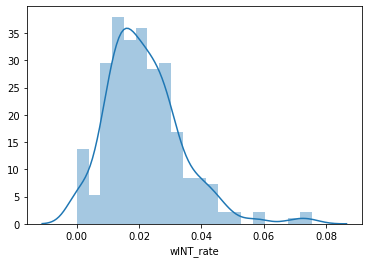

In [0]:
ax = sns.distplot(qual_winners['wINT_rate'], bins=20)

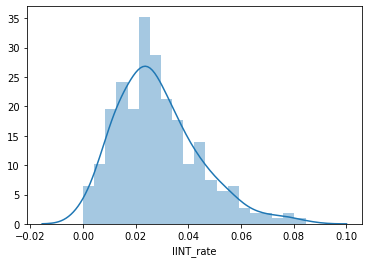

In [0]:
ax = sns.distplot(qual_losers['lINT_rate'], bins=20)

Both rates are normally distributed.

This analysis offers more support for the hypothesis: passers that are trailing by more than 3 have higher interception rates. 

However, it is possible this bucket contains more poor players. In this case, the high interception rates could be causing the big deficits as much or more than the big deficits are causing the high interception rates.

Therefore, it will be important to limit the data to include passers who have thrown a sufficient number of passes in both buckets.

In [0]:
#Step 4: Join sets and test significance

comb=pd.merge(qual_losers, qual_winners, on='PasserYearID')

stats.ttest_ind(comb['wINT_rate'], comb['lINT_rate'])


Ttest_indResult(statistic=-4.24347584435522, pvalue=2.6607776364735695e-05)

There is a significant difference between a quarterback's interception rate when his team is losing by 4 or more and winning/within 3 points.

In [0]:
shape = comb.shape

print(str(shape[0]) + " quarterbacks were in our sample.")

232 quarterbacks were in our sample.


In [0]:
comb['Diff'] = (comb.wINT_rate - comb.lINT_rate)

comb.Diff.mean()

#Average decline was about 0.6 percentage points.

-0.00529071304844311

Why? Hypothesis: Teams attempt riskier throws when trailing by more than 3 points.


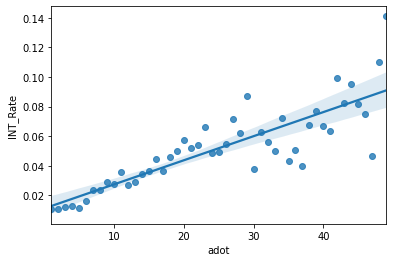

In [0]:
#Step 5: Test average depth of target (aDOT; in other words, how far down the field the quarterback throws the ball)

#aDOT is measured by dividing a passer's total air yards by his total number of throws

#Passes throw further down the field are more likely to be intercepted.

int_by_adot = df.loc[(df['play_type']=='pass') & (df['air_yards']>0) & (df['air_yards']<50) & (df['pass_attempt']==1)].groupby(by='air_yards')[['interception', 'complete_pass', 'incomplete_pass', 'air_yards']].sum()
int_by_adot['INT_Rate'] = int_by_adot.interception/(int_by_adot.complete_pass+int_by_adot.incomplete_pass)
int_by_adot['adot'] = int_by_adot.air_yards/(int_by_adot.complete_pass+int_by_adot.incomplete_pass)


sns.regplot(x="adot", y="INT_Rate", data=int_by_adot)

In [0]:
#aDOT significance test
stats.ttest_ind(comb['aDOT_x'], comb['aDOT_y'])


Ttest_indResult(statistic=5.504508300677684, pvalue=6.149008411376529e-08)

In [0]:
Trailing_aDOT = qual_losers['air_yards'].sum()/qual_losers['throws'].sum()

Winning_or_Close_aDOT = qual_winners['air_yards'].sum()/qual_winners['throws'].sum() 

print("Passers that are losing by more than 3 throw the ball an average of " + str(Trailing_aDOT) + " yards down the field.")
print("Passers that are winning or within 3 points throw the ball an average of " + str(Winning_or_Close_aDOT) + " yards down the field.")


Passers that are losing by more than 3 throw the ball an average of 8.53964337259649 yards down the field.
Passers that are winning or within 3 points throw the ball an average of 8.035654397940345 yards down the field.


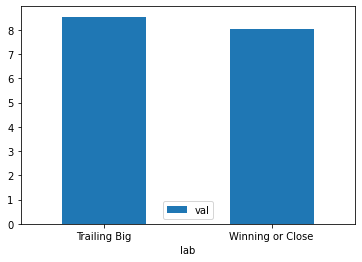

In [0]:
graph = pd.DataFrame({'lab':['Trailing Big', 'Winning or Close'], 'val':[Trailing_aDOT, Winning_or_Close_aDOT]})
ax = graph.plot.bar(x='lab', y='val', rot=0)



This difference is significant. 

Is this increase only a matter of increased air yards or something more? 

In [0]:
#Step 6: Test interception rates on only short throws

#The league's official stats consider short throws to be those under 15 yards.

short_winners = df.loc[(df['score_differential']>=-3) & (df['pass_attempt']==1) & (df['air_yards']<15)].groupby(by='PasserYearID')[['complete_pass', 'incomplete_pass', 'interception', 'yards_gained', 'sack', 'pass_attempt', 'air_yards', 'success']].sum()

short_winners['throws'] = short_winners.complete_pass + short_winners.incomplete_pass

short_winners['wINT_rate'] = short_winners.interception/short_winners.throws

short_losers = df.loc[(df['score_differential']<-3) & (df['pass_attempt']==1) & (df['air_yards']<15)].groupby(by='PasserYearID')[['complete_pass', 'incomplete_pass', 'interception', 'yards_gained', 'sack', 'pass_attempt', 'air_yards', 'success']].sum()

short_losers['throws'] = short_losers.complete_pass + short_losers.incomplete_pass

short_losers['lINT_rate'] = short_losers.interception/short_losers.throws


In [0]:
qual_short_losers = short_losers.loc[short_losers['throws']>50]

qual_short_winners = short_winners.loc[short_winners['throws']>50]

short_comb=pd.merge(qual_short_losers, qual_short_winners, on='PasserYearID')

stats.ttest_ind(short_comb['wINT_rate'], short_comb['lINT_rate'])

Ttest_indResult(statistic=-2.3306680391878554, pvalue=0.020236833225196826)

In [0]:
short_comb.interception_x.sum()/short_comb.throws_x.sum()

0.017245825543162917

Difference is significant.

This implies that passers in addition to attempting throws further down the field, they are also taking more risks when controlling for depth of throw.

In [0]:
#Step 7: Use these conclusions to derive score-based Expected Interception Rate.


This can help tell us if a quarterback's low interception rate was the product of skilled play or merely frequently playing with a lead.

In [0]:
#Step 7a: Calculate 2019 INT% leaderboard

passers_2019 = df.loc[(df['pass_attempt']==1) & (df['StrYear']=='2019')].groupby(by='passer_player_name')[['complete_pass', 'incomplete_pass', 'interception', 'yards_gained', 'sack', 'pass_attempt', 'air_yards', 'success']].sum()

passers_2019['throws'] = passers_2019.complete_pass + passers_2019.incomplete_pass

passers_2019['INT_rate'] = passers_2019.interception/passers_2019.throws

qual_passers_2019 = passers_2019.loc[(passers_2019['throws']>=100)].groupby(by='passer_player_name')[['throws', 'interception', 'INT_rate']].sum()

qual_passers_2019.sort_values('INT_rate')



,throws,interception,INT_rate
passer_player_name,,,
A.Rodgers,567.0,4.0,0.007055
R.Wilson,513.0,5.0,0.009747
C.Wentz,604.0,6.0,0.009934
T.Bridgewater,196.0,2.0,0.010204
P.Mahomes,484.0,5.0,0.010331
D.Brees,372.0,4.0,0.010753
M.Mariota,157.0,2.0,0.012739
G.Minshew,468.0,6.0,0.012821
T.Brady,612.0,8.0,0.013072


In [0]:
#Step 7b: Calculate each's quarterback's expected interception total when winning/score is close

#Expected Interception Rate: League average INT% with this score situtaion * throws

#i.e. how many interceptions would this player have thrown if he had a league-average INT% rate

winners_2019 = df.loc[(df['score_differential']>=-3) & (df['pass_attempt']==1) & (df['StrYear']=='2019')].groupby(by='passer_player_name')[['complete_pass', 'incomplete_pass', 'interception', 'yards_gained', 'sack', 'pass_attempt', 'air_yards', 'success']].sum()

winners_2019['throws'] = winners_2019.complete_pass + winners_2019.incomplete_pass

xINT_rate_w = winners_2019.interception.sum()/winners_2019.throws.sum()

winners_2019['Expected_Interceptions'] = winners_2019['throws']*xINT_rate_w

winners_2019.sort_values('Expected_Interceptions', ascending=False)


,complete_pass,incomplete_pass,interception,yards_gained,sack,pass_attempt,air_yards,success,throws,Expected_Interceptions
passer_player_name,,,,,,,,,,
T.Brady,284.0,175.0,7.0,2916,19.0,479.0,3342.0,200,459.0,9.055884
J.Goff,258.0,156.0,8.0,3212,12.0,426.0,3314.0,201,414.0,8.168052
P.Mahomes,271.0,140.0,4.0,3327,13.0,425.0,3618.0,209,411.0,8.108863
J.Garoppolo,269.0,121.0,12.0,2904,30.0,423.0,2505.0,204,390.0,7.694542
A.Rodgers,241.0,132.0,2.0,2673,29.0,403.0,3199.0,179,373.0,7.359139
J.Winston,234.0,138.0,15.0,3025,32.0,406.0,3709.0,196,372.0,7.339409
L.Jackson,217.0,99.0,4.0,2459,19.0,335.0,2739.0,171,316.0,6.234552
C.Wentz,196.0,112.0,2.0,1908,18.0,329.0,2244.0,155,308.0,6.076715
K.Cousins,218.0,84.0,3.0,2473,14.0,317.0,2183.0,163,302.0,5.958338


In [0]:
#Step 7c: Same process, but for situations when the passer is trailing by 4+



losers_2019 = df.loc[(df['score_differential']<-3) & (df['pass_attempt']==1) & (df['StrYear']=='2019')].groupby(by='passer_player_name')[['complete_pass', 'incomplete_pass', 'interception', 'yards_gained', 'sack', 'pass_attempt', 'air_yards', 'success']].sum()

losers_2019['throws'] = losers_2019.complete_pass + losers_2019.incomplete_pass

xINT_rate_l = losers_2019.interception.sum()/losers_2019.throws.sum()

losers_2019['Expected_Interceptions'] = losers_2019['throws']*xINT_rate_l

losers_2019.sort_values('Expected_Interceptions', ascending=False)


,complete_pass,incomplete_pass,interception,yards_gained,sack,pass_attempt,air_yards,success,throws,Expected_Interceptions
passer_player_name,,,,,,,,,,
A.Dalton,211.0,125.0,11.0,2141,28.0,366.0,2608.0,161,336.0,9.008507
M.Ryan,228.0,96.0,8.0,2163,24.0,352.0,2518.0,174,324.0,8.686775
D.Prescott,188.0,110.0,3.0,2423,13.0,312.0,2947.0,162,298.0,7.989688
G.Minshew,179.0,119.0,5.0,1987,19.0,320.0,2252.0,135,298.0,7.989688
C.Wentz,192.0,104.0,4.0,1905,19.0,315.0,2532.0,146,296.0,7.936066
D.Jones,178.0,113.0,8.0,1794,20.0,313.0,2320.0,131,291.0,7.802011
P.Rivers,188.0,103.0,10.0,2053,12.0,304.0,2480.0,150,291.0,7.802011
K.Murray,186.0,102.0,7.0,2043,28.0,318.0,2368.0,142,288.0,7.721578
K.Allen,179.0,103.0,13.0,1666,23.0,306.0,2114.0,140,282.0,7.560712


In [0]:
#Step 7d: Combining the two sets, to get a total expected interceptions total

comb_2019 = comb=pd.merge(winners_2019, losers_2019, on='passer_player_name')

comb_2019['Total_Throws'] = comb_2019.throws_x+comb_2019.throws_y

comb_2019['Total_Interceptions'] = comb_2019.interception_x+comb_2019.interception_y

comb_2019['Total_Expected_Interceptions'] = comb_2019.Expected_Interceptions_x+comb_2019.Expected_Interceptions_y

qual_comb_2019 = comb_2019.loc[(comb_2019['Total_Throws']>=150)].groupby(by='passer_player_name')[['Total_Throws', 'Total_Interceptions', 'Total_Expected_Interceptions']].sum()

qual_comb_2019['Diff'] = qual_comb_2019.Total_Expected_Interceptions - qual_comb_2019.Total_Interceptions

qual_comb_2019.sort_values('Diff', ascending=False)

,Total_Throws,Total_Interceptions,Total_Expected_Interceptions,Diff
passer_player_name,,,,
A.Rodgers,567.0,4.0,12.560479,8.560479
C.Wentz,604.0,6.0,14.012781,8.012781
R.Wilson,513.0,5.0,11.679199,6.679199
G.Minshew,468.0,6.0,11.343719,5.343719
T.Brady,612.0,8.0,13.157972,5.157972
P.Mahomes,484.0,5.0,10.066069,5.066069
D.Prescott,592.0,9.0,13.790189,4.790189
D.Brees,372.0,4.0,8.040472,4.040472
J.Brissett,444.0,6.0,9.772586,3.772586


In [0]:
#Step 7e: Use this data to calculate an expected interception rate and compare that to each passer's actual rate

qual_comb_2019['INT_Rate'] = qual_comb_2019.Total_Interceptions/qual_comb_2019.Total_Throws

qual_comb_2019['xINT_Rate'] = qual_comb_2019.Total_Expected_Interceptions/qual_comb_2019.Total_Throws

qual_comb_2019['Rate_Diff'] = qual_comb_2019.xINT_Rate - qual_comb_2019.INT_Rate

del qual_comb_2019['Total_Interceptions']

del qual_comb_2019['Total_Expected_Interceptions']

del qual_comb_2019['Diff']

qual_comb_2019.sort_values('Rate_Diff', ascending=False)


,Total_Throws,INT_Rate,xINT_Rate,Rate_Diff
passer_player_name,,,,
A.Rodgers,567.0,0.007055,0.022153,0.015098
C.Wentz,604.0,0.009934,0.023200,0.013266
R.Wilson,513.0,0.009747,0.022766,0.013020
G.Minshew,468.0,0.012821,0.024239,0.011418
D.Brees,372.0,0.010753,0.021614,0.010861
P.Mahomes,484.0,0.010331,0.020798,0.010467
M.Mariota,157.0,0.012739,0.023158,0.010419
T.Bridgewater,196.0,0.010204,0.020416,0.010212
J.Brissett,444.0,0.013514,0.022010,0.008497


In [0]:
#Step 7f: #Standardize Both Rates

from scipy.stats import zscore

standardized = qual_comb_2019.apply(zscore)

del standardized ['Total_Throws']
del standardized ['Rate_Diff']

standardized


,INT_Rate,xINT_Rate
passer_player_name,,
A.Dalton,0.441749,1.556837
A.Rodgers,-1.468609,-0.593787
B.Mayfield,1.648496,0.283532
C.Keenum,-0.184664,1.259203
C.Wentz,-1.191782,0.452615
D.Blough,1.168616,0.970121
D.Brees,-1.113043,-1.131599
D.Carr,-0.635713,0.196274
D.Haskins,1.185030,1.678605


In [0]:
standardized['Diff'] = standardized.xINT_Rate - standardized.INT_Rate

standardized.sort_values('Diff', ascending=False)

,INT_Rate,xINT_Rate,Diff
passer_player_name,,,
G.Minshew,-0.914221,1.490326,2.404547
C.Wentz,-1.191782,0.452615,1.644398
C.Keenum,-0.184664,1.259203,1.443867
M.Mariota,-0.922072,0.410241,1.332314
D.Prescott,-0.685172,0.546791,1.231963
R.Wilson,-1.209780,0.019549,1.229329
A.Dalton,0.441749,1.556837,1.115089
D.Jones,0.377821,1.490392,1.112571
A.Rodgers,-1.468609,-0.593787,0.874823


Conclusions: 

-This analysis allows us to find insights that would otherwise not be available when looking at raw interception rates. 

-Instead of analyzing a quarterback's ability (or lack thereof) to avoid interceptions by looking at his raw interception rate, we should instead measure this skill by comparing his actual rate to his expected rate.

-A quarterback with a higher interception rate than expected can be said to have given a below average performance, but a passer with a lower raw rate than his expected mark should be viewed as above average (even if his raw mark is worse than average).

-This is because, as the data shows, when passers are trailing, they are more likely to throw interceptions, so passers on teams who frequently trail would be expected to post higher interception rates than those who frequently play from ahead.

-Example:

Consider Andy Dalton, who had a higher (i.e. worse) interception rate than league average -- 0.4 standard deviations above average. However, given the deficits his team faced, we would have expected him to post an interception rate that was much worse -- 1.6 SD higher.

Therefore, we can assess that his interception avoidance was better than an average. Decision makers at the team level should accordingly not hold his substandard raw interception rate against him, when considering the length and value of his contract, for example. 

Rather, they should actually view his ability to post a lower interception rate than what would have been expected as an asset.

Looking at his unadjusted interception total would cause stakeholders to incorrectly assume Dalton struggled with interceptions in 2019. In actuality, he was better in this regard than what we would have expected from an average quarterback, given his team so frequently trailed.